In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0) 


In [3]:
(x_train , y_train),(x_test,y_test)=mnist.load_data() 

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
assert(x_train.shape[0]==y_train.shape[0]),"the number of images is not equal to the number of labels"
assert(x_test.shape[0]==y_test.shape[0]),"the number of images is not equal to number of labels"
assert(x_train.shape[1:]==(28,28)),"the dimension of images is not 28x28"
assert(x_test.shape[1:]==(28,28)),"the dimension of images is not 28x28"
num_of_samples = []
 

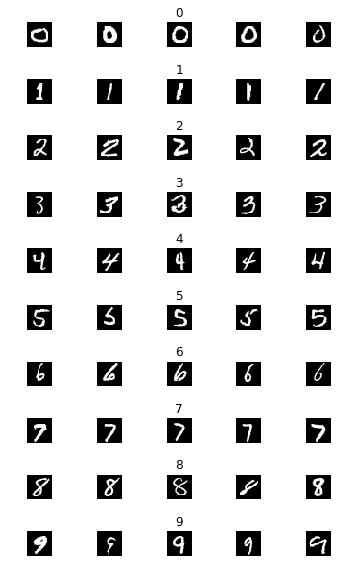

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

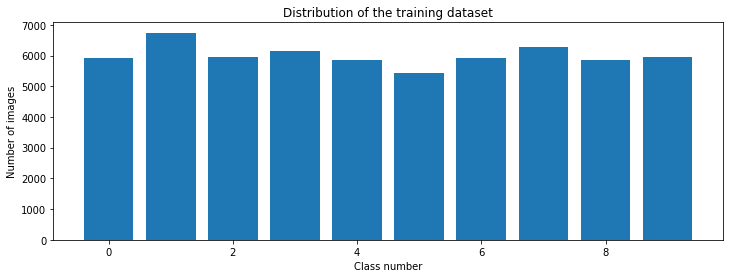

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")


In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [9]:
x_train=x_train/255#normalisation
y_train=y_train/255

In [10]:
num_pixels=784
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

In [11]:
def create_model():
    model=Sequential()
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0017 - acc: 0.8655 - val_loss: 7.8359e-04 - val_acc: 0.9413
Epoch 2/10
54000/54000 [==============================] - 2s 33us/step - loss: 7.8489e-04 - acc: 0.9402 - val_loss: 6.7483e-04 - val_acc: 0.9513
Epoch 3/10
54000/54000 [==============================] - 2s 33us/step - loss: 6.4405e-04 - acc: 0.9511 - val_loss: 5.6751e-04 - val_acc: 0.9588
Epoch 4/10
54000/54000 [==============================] - 2s 33us/step - loss: 5.7720e-04 - acc: 0.9556 - val_loss: 5.4546e-04 - val_acc: 0.9608
Epoch 5/10
54000/54000 [==============================] - 2s 32us/step - loss: 4.9282e-04 - acc: 0.9621 - val_loss: 4.7793e-04 - val_acc: 0.9667
Epoch 6/10
54000/54000 [==============================] - 2s 32us/step - loss: 4.6771e-04 - acc: 0.9642 - val_loss: 5.0747e-04 - val_acc: 0.9622
Epoch 7/10
54000/54000 [==============================] - 2s 31us/step - loss: 4.4194

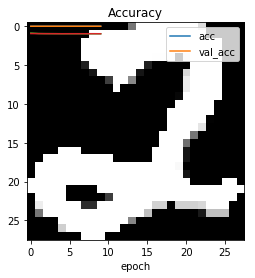

In [13]:
model = create_model()


history = model.fit(x_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

score = model.evaluate(x_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1, 784)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))